In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier  #pip install scikit-learn
from knn import KNN

In [42]:
def generate_dataset(n):
    apple_width = np.random.normal(6, 1, n) 
    apple_length = np.random.normal(6, 1, n)
    banana_width = np.random.normal(4, 1, n)
    banana_length = np.random.normal(8, 1, n)

    width = np.concatenate((apple_width, banana_width)) 
    length = np.concatenate((apple_length, banana_length))
    X = np.array([width, length]).T 

    Y_apples = np.zeros(n, dtype='int')   
    Y_bananas = np.ones(n, dtype='int')  
    Y = np.concatenate((Y_apples, Y_bananas))

    return X, Y

In [43]:
X_train, Y_train = generate_dataset(100)

In [44]:
X_train

array([[ 5.73224398,  6.24310301],
       [ 6.28154855,  7.47756046],
       [ 5.5628372 ,  5.04157365],
       [ 6.19454805,  5.26128123],
       [ 5.82380083,  6.77288494],
       [ 4.50637116,  6.70584772],
       [ 5.15405204,  5.68225208],
       [ 5.77318207,  5.11845237],
       [ 7.83228345,  5.82095959],
       [ 6.18036375,  6.33535814],
       [ 6.35545621,  7.08697972],
       [ 6.20676055,  5.39423494],
       [ 7.11997213,  5.60554112],
       [ 5.78829104,  5.6954745 ],
       [ 5.38614989,  6.61490452],
       [ 6.68009348,  5.58904383],
       [ 6.11172944,  6.35462278],
       [ 5.63329595,  4.08164393],
       [ 6.62469699,  4.93879468],
       [ 6.14728147,  4.10443487],
       [ 7.80083629,  5.67584269],
       [ 6.09775795,  6.84000923],
       [ 4.95185113,  5.4165443 ],
       [ 7.27373238,  5.96072753],
       [ 6.01931339,  5.5735639 ],
       [ 5.33975053,  5.564895  ],
       [ 6.43242921,  4.64320641],
       [ 7.59408589,  5.62797926],
       [ 5.02659859,

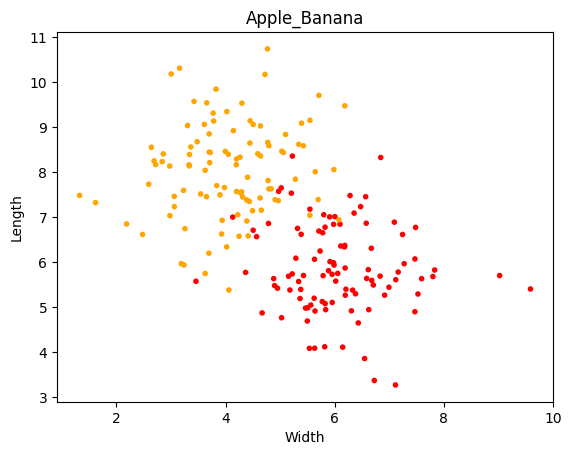

In [45]:
cmap=['red', 'orange']
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap= ListedColormap(cmap), marker=".") 
plt.title("Apple_Banana")
plt.xlabel("Width")
plt.ylabel("Length")
plt.show()

In [46]:
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [47]:
new_fruit = np.array([4, 8.5])  # width: 4 _ length: 8.5
new_fruit2 = np.array([6, 6])
new_fruit3 = np.array([4, 7])
new_fruits = [new_fruit, new_fruit2, new_fruit3]

outputs = knn.predict(new_fruits)

In [48]:
for output in outputs:
    if output == 0:
        print("Apple")
    else:
        print("Banana")   

Banana
Apple
Banana


ارزیابی جواب درست

In [49]:
X_test, Y_test = generate_dataset(50)

In [50]:
knn.evaluate(X_test, Y_test)

0.9

In [ ]:
Y_pred = knn.predict(X_test)
Y_pred  # پیش بینی ما

In [52]:
confusion_matrix = np.zeros((2, 2))

for i in range(100):
    if Y_test[i] == 0 and Y_pred[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[0][1] += 1    
    elif Y_test[i] == 1 and Y_pred[i] == 0:
        confusion_matrix[1][0] += 1    
    elif Y_test[i] == 1 and Y_pred[i] == 1:
        confusion_matrix[1][1] += 1 

confusion_matrix               



array([[44.,  6.],
       [ 4., 46.]])

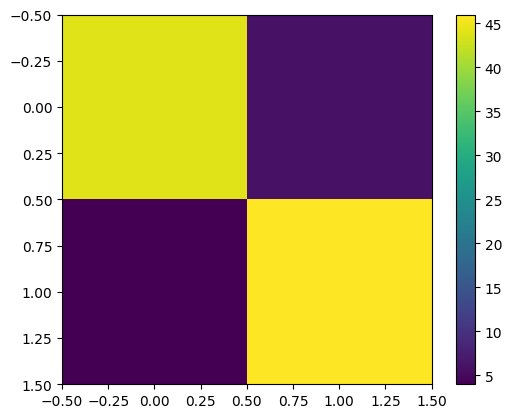

In [53]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

استفاده از کتابخانه sKlearn

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

knn.predict(new_fruits)

array([1, 0, 1])

In [55]:
knn.score(X_test, Y_test)   #ارزیابی جواب درست با استفاده از کتابخانه سایکیتلرن

0.9